<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 12, 2021</center></h4>
<h4><center><font color="red">Submit: December, 2021</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Name: </h4><br>
<p> Monica Lara Pineda  <br>
 Manuel Ortiz Hernández <br> 
 Omar Alejandro Robledo Rodríguez <br> 
 Diego Ramírez Levy <br> 
 Raúl González Cardona </p>
<h4>Student ID: </h4>
 <p>A01655306 <br>
 A01655515 <br>
 A01338010 <br>
 A01367771 <br> 
 A01654995</p>    <h4>Github:</h4>

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Aprendizaje Máquina</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La fecha límite de entrega de la notebook será: 2021.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Intentar presentar un enfoque completo para modelar problemas, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado a nuestros datos.

El contenido de esta notebook está dirigido principalmente para entender mejor las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo).

### Descripción <br>
La enfermedad cardiovascular es un termino que engloba varios problemas del corazón, así como los vasos sanguíneos. Estas afecciones del corazón ocurren a menudo cuando la grasa y el colesterol se acumulan en las paredes del vaso sanguíneo, esta acumulación con el tiempo puede estrechar los vasos sanguíneos y causar problemas en todo el cuerpo, pero en el momento en que una arteria resulta obstruida, se puede presentar un ataque cardiaco o un accidente cerebrovascular.
<br>
### Ejemplo enfermedades: <br>
    - Enfermedad de las arterias coronarias.
    - Problemas en ritmo cardíaco. <br>
    - Defectos cardíacos de nacimiento, defectos congénitos. <br>
    - Enfermedad de las válvulas cardiacas. <br>
    - Enfermedad del músculo cardiaco. <br>
    - Infección del corazón.<br>


### Datos en México

#### Causas de muerte en México (2010 - 2020):

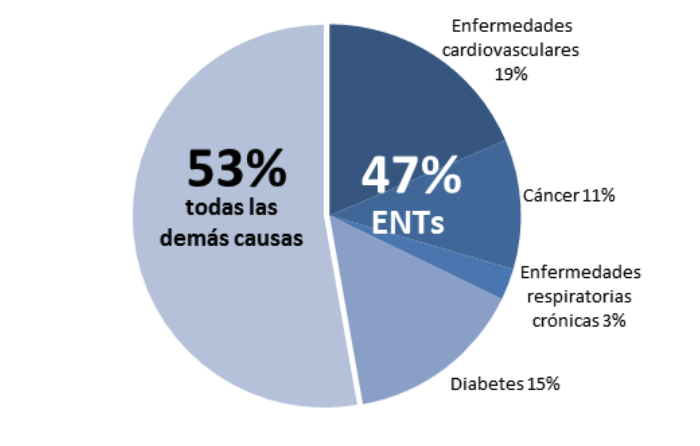

#### Datos enfermedades relacionados al corazón

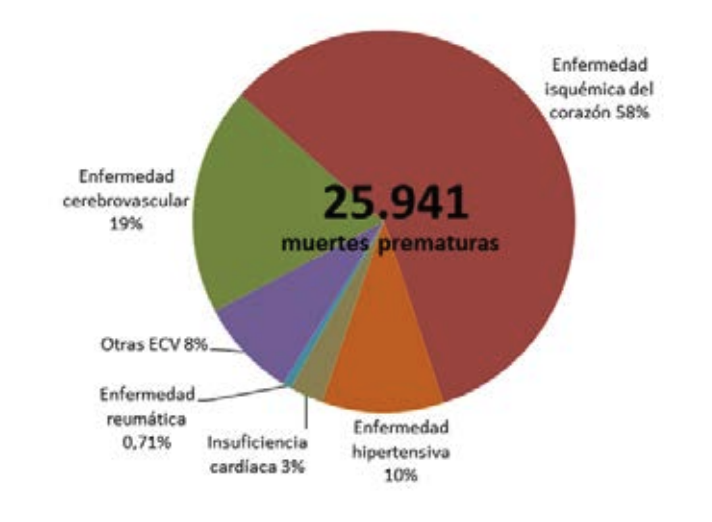

### Objetivo modelo
<br>
El objetivo de crear el siguiente modelo, es con el fin de poder dar un seguimiento a corto o largo plazo al modelo, con el fin de poder establecer una opción viable para aquellos que puedan llegar a ser diagnosticados con cualquier enfermedad relacionada con el corazón y que cuenten con el tiempo adecuado para poder tratarse y evitar cualquier otra consecuencia que conlleve la enfermedad.

-----

<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

In [80]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
df = pd.read_csv('../data/heart.csv')

In [81]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


_____
Presentar dataset y las variables independientes

### Limpieza de datos

A continuación, en nuestro dataset encontramos algunos valores que no nos permiten trabajar con nuestro modelo de la forma adecuada. Por ende, decidimos ejecutar una forma de limpieza de datos, donde cambiaremos información con la que nuestro modelo no puede trabajar correctamente.

In [83]:
import copy

label_sex = ['M', 'F']
label_chPT = ['ATA', 'NAP', 'TA', 'ASY']
label_rECG = ['Normal', 'ST', 'LVH']
label_eA = ['N', 'Y']
label_stS = ['Up', 'Flat', 'Down']
heart_df = copy.deepcopy(df)
def clean_string(c, df, label):
    heart_df[c] = df[c].apply(lambda x: label.index(x))

Previamente, guardamos en listas cada uno de las etiquetas cuyo valor deseábamos modificar. 
Es decir, si el sexo es masculino o femenino, previamente nos encontrábamos con valores como <b>M</b> o <b>F</b>, ahora, lo reasiganmos para que estos valores sean <b>0</b> o <b>1</b> respectivamente. <br>
Y así sucesivamente con las demás etiquetas.

In [84]:
clean_string('Sex', df, label_sex)
clean_string('ChestPainType', df, label_chPT)
clean_string('RestingECG', df, label_rECG)
clean_string('ExerciseAngina', df, label_eA)
clean_string('ST_Slope', df, label_stS)

heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


El dataset ya no contiene strings, ahora contiene los labels de cada de una de las variables correspondientes a su columna :)

### Verificar valores nulos

In [85]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Al no contener valores nulos, no es necesario reajustar ciertos valores ;)

<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

### Separación de variables independientes

In [86]:
heart_df['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Gráfica relación Enfermos vs Edad

/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


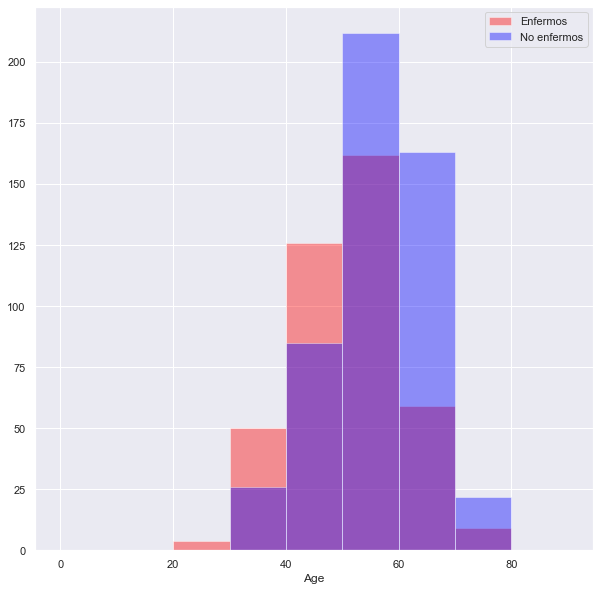

In [151]:
import seaborn as sns
from pandas import DataFrame
from matplotlib.pyplot import show, legend

bins = range(0, 100, 10)
ax = sns.distplot(df.Age[df.HeartDisease==0],
              color='red', kde=False, bins=bins, label='Enfermos')
sns.distplot(df.Age[df.HeartDisease==1],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label='No enfermos')
sns.set(rc={'figure.figsize':(10,10)})
legend()
show()

### Gráfica relación Sexo vs Enfermos

<AxesSubplot:title={'center':'Femenino vs Masculino enfermos'}, ylabel='HeartDisease'>

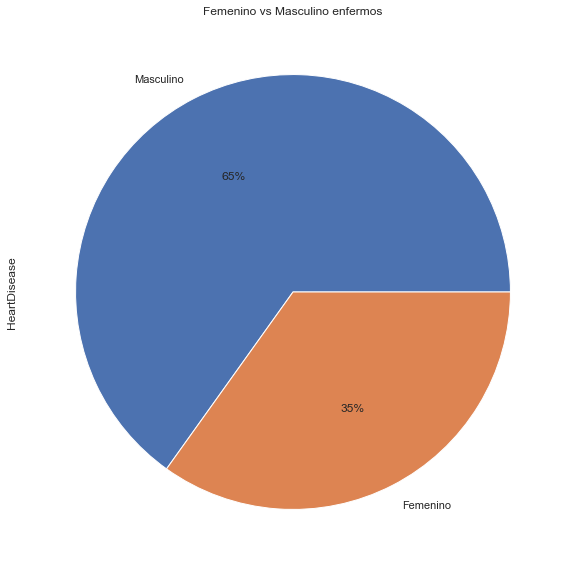

In [150]:
pie_df = df[df['HeartDisease'] == 0]
pie_df[['Sex']].value_counts().plot.pie(labels=['Masculino', 'Femenino'], ylabel="HeartDisease", title="Femenino vs Masculino enfermos", autopct='%1.0f%%')

### Gráfica relación nivel colesterol

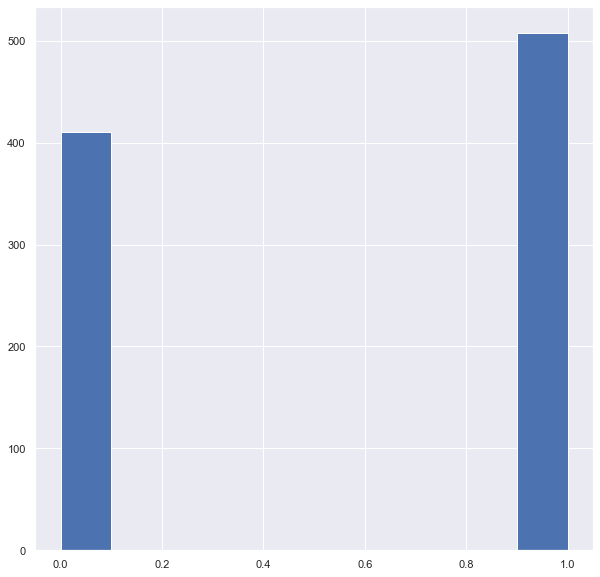

In [138]:
plt.hist([df['HeartDisease']])
plt.show()

Nuesta columna <b>HeartDisease</b> cuenta con la información importante con respecto a si las variables suman para demostrar si el paciente cuenta con una enfermedad o no, siendo demostrado por <b>0</b> y <b>1</b>.

In [140]:
#Variable independientes
X = heart_df.drop(columns = 'HeartDisease') 
y = heart_df['HeartDisease']  #0 = no la tenga, 1 = sí la tenga la disease 

### División de datos 80/20
Es momento de entrenar nuestro modelo. Para ello, ocuparemos un 20% de nuestro datase para el entrenamiento

In [141]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


## Random Forest 
El modelo que aplicamos, para la primera parte del notebook será  Random Forest, ya que contamos con un dataset que contiene muchas variables que nos ayudan a predecir si presenta una enfermedad en el corazón o no. 


In [146]:

from sklearn.ensemble import RandomForestClassifier
print("#----------------------------------#")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Matríz de Confusión")
matrix = confusion_matrix(y_train, rfc.predict(X_train), labels=[1,0])
print(matrix)
print("Precisión del modelo")
#print(accuracy_score(y_test, rfc.predict(X_test)))

rfc.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, rfc.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, rfc.predict(X_test))]})

#----------------------------------#
Matríz de Confusión
[[399   0]
 [  0 335]]
Precisión del modelo


,Accurancy on Train,Accurancy on Test
0,1.0,0.880435


En nuestro matriz de confusión, podemos observar que tenemos un total de 399 pacientes, los cuales, nuestro modelo los considero como: <br>
    
[ ............... ]            [ Verdadero ]                              [ Falso ] <br>
<br>
[ Positivo  ]  [ N verdaderos positivos ]              [ N falsos negativos  (Error Tipo 2) ] <br>
<br>
 [ Negativo  ]  [ N falsos positivos (Error Tipo 1)]    [ N  verdaderos negativos]    
 
 <br>
Donde 399 pacientes tenían varias condiciones que se podían catalogar con que sí tenían la enfermedad y en efecto, contaban con dicha falla del corazón.
<br><br>

Por otra parte, hay 335 pacientes, los cuales tenían varias condiciones que se podían catalogar con que sí tenían la enfermedad y en realidad no contaban con dicha falla del corazón. 

### Demostración visual del modelo

In [162]:
from sklearn import tree

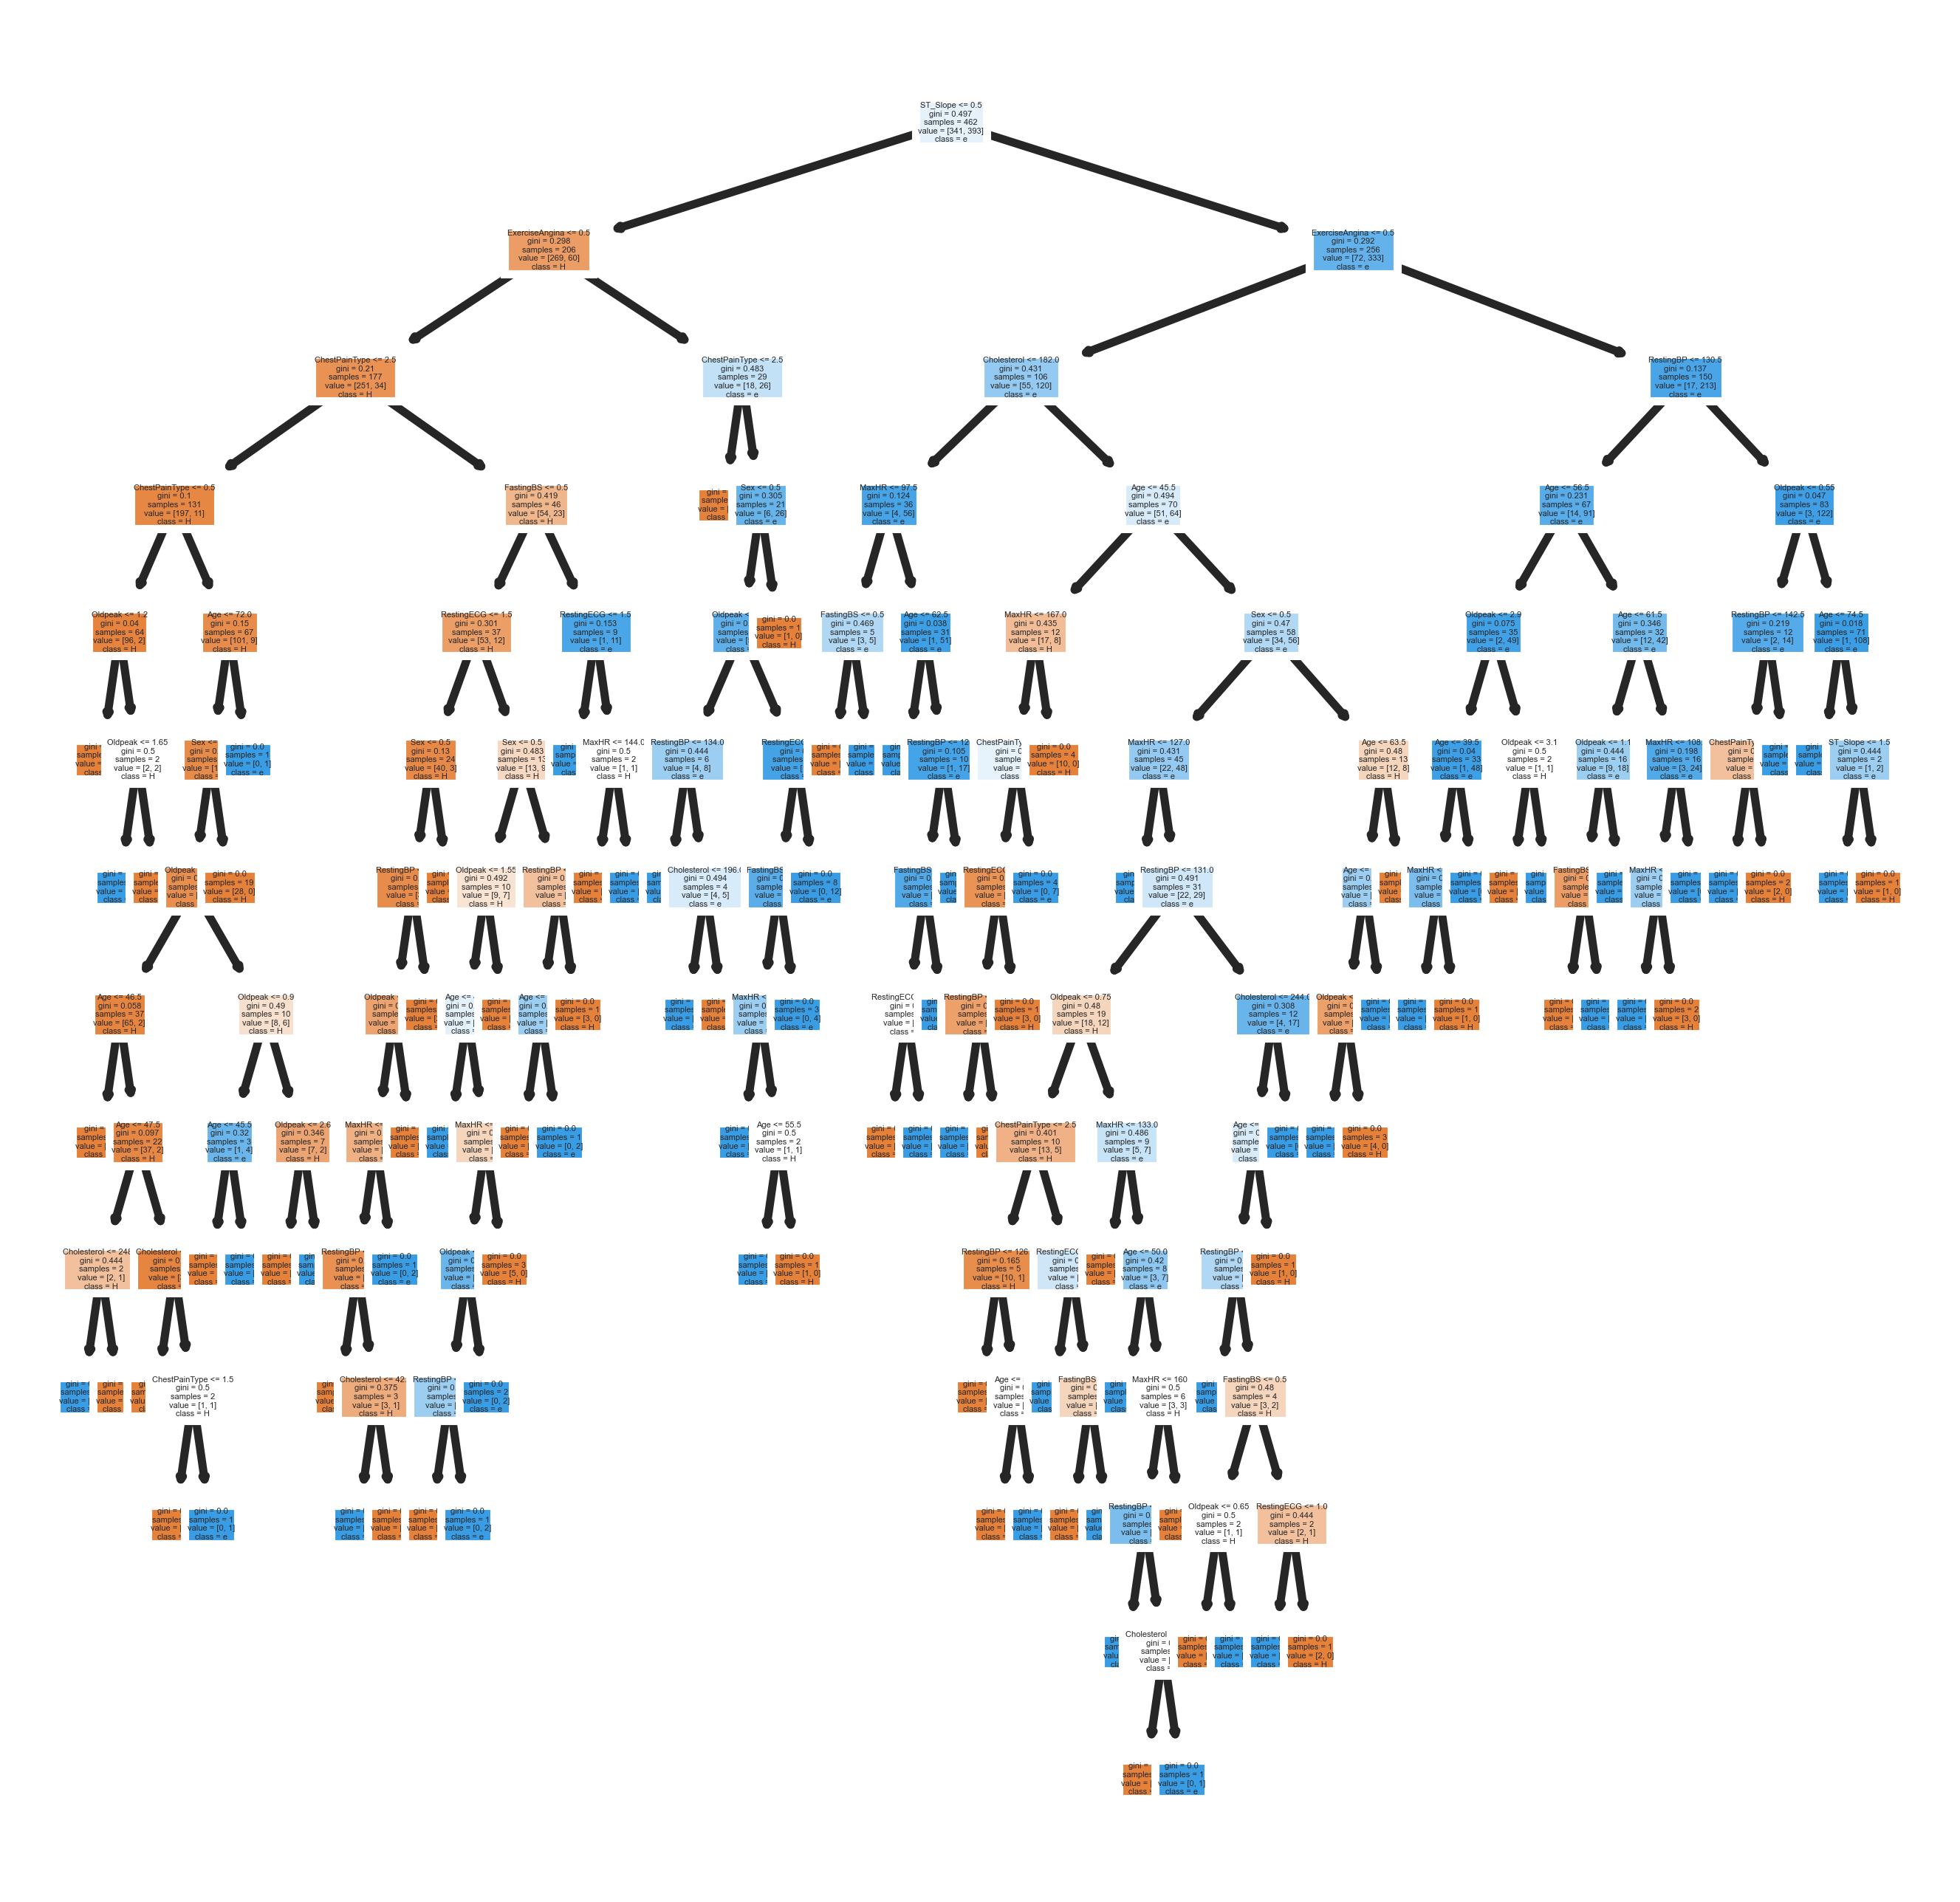

In [163]:
fn= X.columns
cn= 'HeartDisease'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

Este árbol de decisiones nos muestra, visualmente el recorrido que hace nuestro modelo juntando todas las variables inciales que le asignamos desde un inicio, es decir, todas aquellas variables que denotan si el paciente tiene una falla del corazón o no.
<br>

Como nuestro modelo nos demuestra, la ejecución del mismo es importante ya que existe una gran toma de decisiones conforme cada decisión. Esto nos lleva a un modelo más preciso y por ende, al diagnóstico correcto de una posible enfermedad del corazón.
<br>

<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

En cuanto a la precisión de los diferentes modelos, encontramos una correlación con nuestra accuracy inicial, la cual surgió de implementar el modelo de Random Forest.
<br>

<p style="text-align:justify";>Nuestro objetivo al realizar este trabajo fue desarrollar un modelo de machine learning que os ayudara a poder detectar si una persona es propensa o no a una enfermedad del corazón , esto tomando como base distintos indicadores que pueden aportar información relacionada a las enfermedades le corazón. Después del desarrollo de este proyecto, nos dimos cuenta que existen varias herramientas en la disciplina del aprendizaje maquina que hoy en día nos pueden ayudar a la creación de herramientas tecnológicas que a la vez nos faciliten tareas importantes como lo son los diagnósticos médicos. Tan solo con las herramientas que vimos en este curso, pudimos desarrollar un buen modelo para el diagnóstico de enfermedades del corazón, lo que nos indica que si se trabaja aún con más herramientas y con mayor tiempo de dedicación, se pueden lograr modelos que tengan impactos importantes y significantes en la vida de las personas.</p>